In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\Honey\Desktop\Machine_Learning_Algorithms\Datasets\Diabetes.csv")
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
# ProfileReport(df)

In [4]:
df["BMI"].replace(0,round(df["BMI"].mean(),1),inplace=True)
df["Glucose"].replace(0,round(df["Glucose"].mean(),1),inplace=True)
df["BloodPressure"].replace(0,round(df["BloodPressure"].mean(),1),inplace=True)
df["SkinThickness"].replace(0,round(df["SkinThickness"].mean(),1),inplace=True)
df["Insulin"].replace(0,round(df["Insulin"].mean(),1),inplace=True)

<AxesSubplot:>

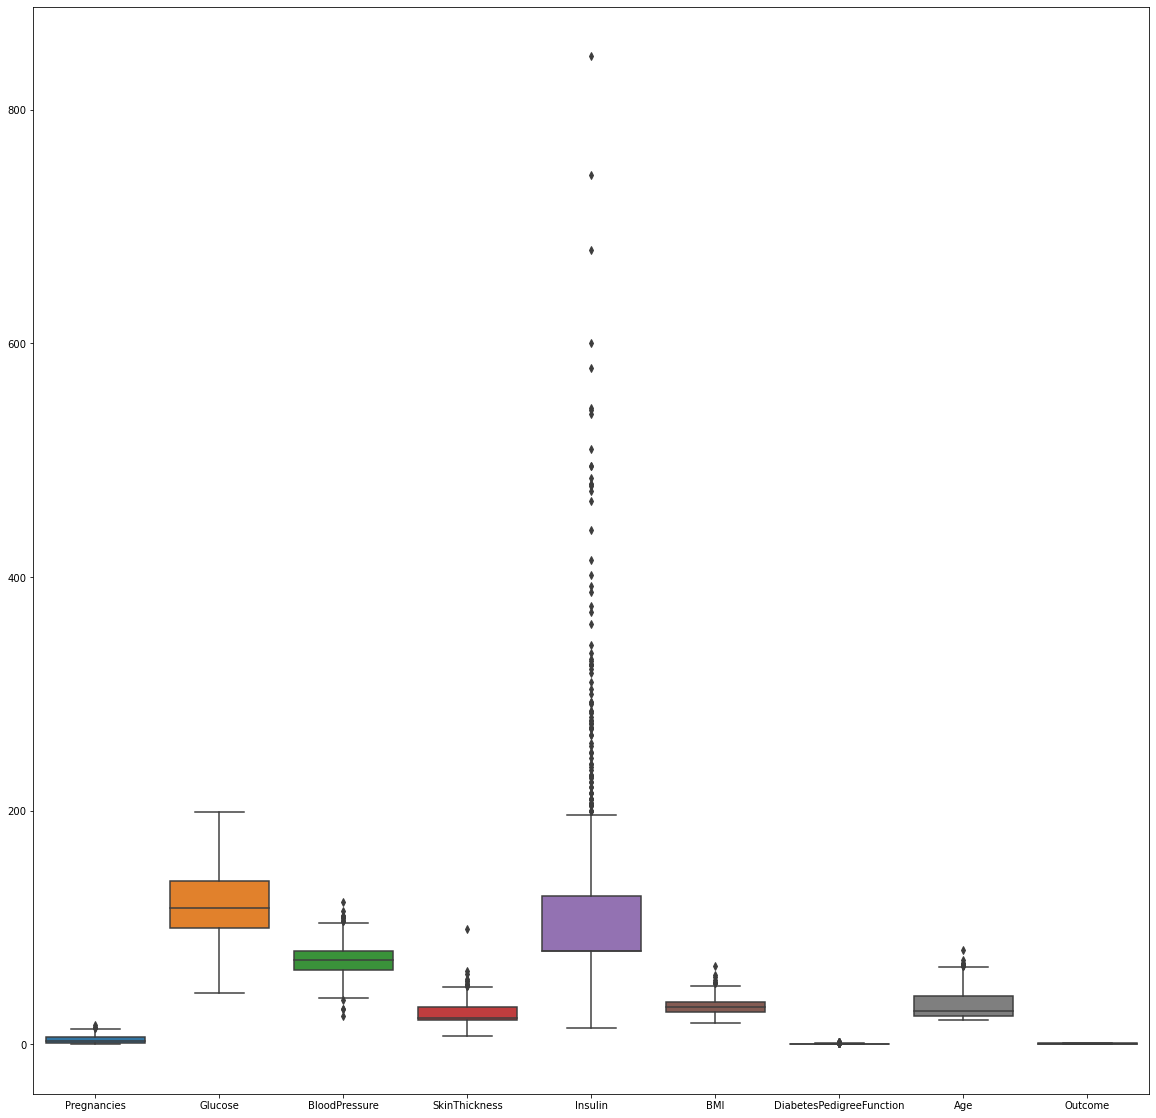

In [5]:
fig,ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df, ax=ax)

In [6]:
y = df["Outcome"]
X = df.drop("Outcome",axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=df.drop("Outcome",axis=1).columns)
vif_df = pd.DataFrame([[df_scaled.columns[i], variance_inflation_factor(df_scaled,i)] 
                       for i in range(df_scaled.shape[1])], columns=["Features", "VIF_Score"])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=144)
log_reg = LogisticRegression(verbose=1, solver='liblinear')
log_reg.fit(X_train, y_train)
log_reg.predict_proba([X_test.iloc[1]])
log_reg.predict([X_test.iloc[1]])
log_reg.predict_log_proba([X_test.iloc[1]])
y_pred = log_reg.predict(X_test)
confusion_matrix(y_test,y_pred)

[LibLinear]

C:\Users\Honey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Honey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Honey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[93,  7],
       [21, 33]], dtype=int64)

In [8]:
TP, FP, FN, TN = confusion_matrix(y_test,y_pred).ravel()
Accuracy = (TP+TN)/(TP+FP+FN+TN)
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Specificity = TN/(FP+TN)
F1_score = 2*Precision*Recall/(Precision+Recall)
Result = {"Accuracy":round(Accuracy,2), "Precision":round(Precision,2),
          "Recall":round(Recall,2), "Specificity":round(Specificity,2), "F1_score":round(F1_score,2)}
auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

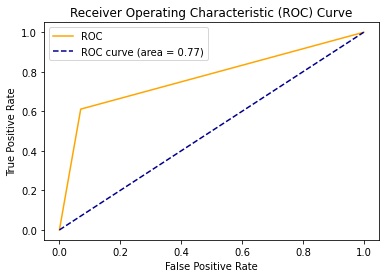

In [9]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()